In [308]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randint(-10,10,size=(200, 2)), columns=list('ab'))
df['y'] = df['a'] + (2 * df['b']) - 2
df.y[df.y>0]=1
df.y[df.y<0]=-1
X = df.iloc[0:200, [0,1]].values
y=df.iloc[0:200, 2].values
print("X_shape " + str(X.shape))
print("Y_shape " + str(y.shape))

X_shape (200, 2)
Y_shape (200,)


In [309]:
class BatchGD(object):

    def __init__(self, eta, epochs):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        w_count=0
        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            w_count+=1
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        print("Weight Updates "+str(w_count))
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

Weight Updates 10


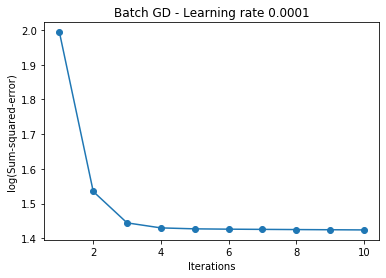

Wall time: 135 ms


In [310]:
%%time
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
ada = BatchGD(epochs=10, eta=0.0001).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), np.log10(ada.cost_), marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(Sum-squared-error)')
plt.title('Batch GD - Learning rate 0.0001')
plt.show()

Weight Updates 5


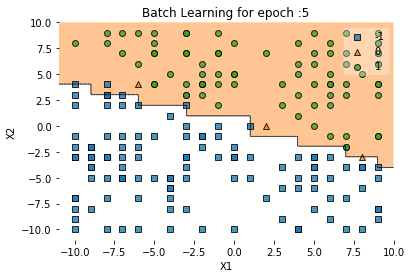

Weight Updates 10


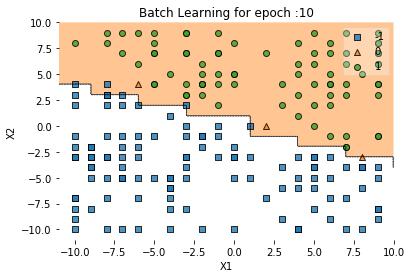

Weight Updates 50


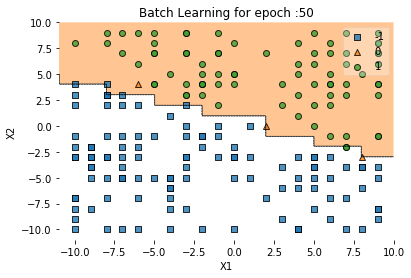

Weight Updates 100


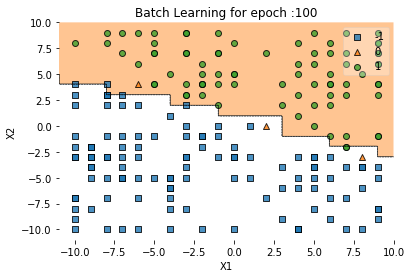

Wall time: 1.11 s


In [311]:
%%time
epoch_lst=[5,10,50,100]
for epoch in epoch_lst:
    ada = BatchGD(0.0001,epoch)
    ada.train(X, y)
    ada.predict(X)
    plot_decision_regions(X, y, clf=ada)
    plt.title('Batch Learning for epoch :'+str(epoch))
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

Weight Updates 10


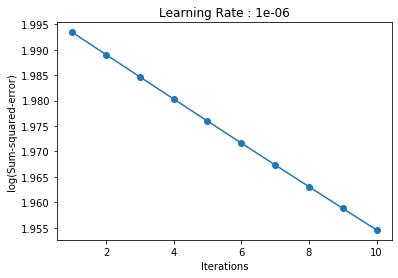

Weight Updates 10


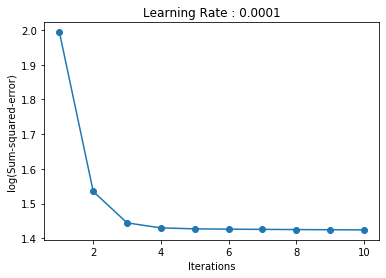

Weight Updates 10


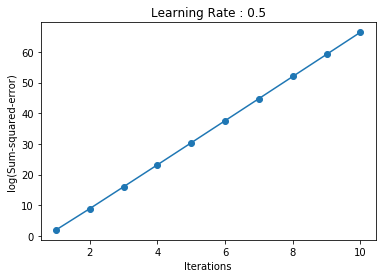

In [312]:
eta_lst=[0.000001,0.0001,0.5]
for eta in eta_lst:
    ada = BatchGD(eta,10)
    ada.train(X, y)
    plt.plot(range(1, len(ada.cost_)+1), np.log10(ada.cost_), marker='o')
    plt.xlabel('Iterations')
    plt.ylabel('log(Sum-squared-error)')
    plt.title('Learning Rate : '+str(eta))
    plt.show()

Learning Rate shouldn't be too small or too large. Too small LR takes a lot of time to converge for the local minima (minimizng error using Gradient Descent). Too high LR skips the local minima and finds the other minimal point(error prone). Hence optimal value has to be chosen.



In [313]:
#Incremental Learning
class StochasticGD(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y, reinitialize_weights=True):

        if reinitialize_weights:
            self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        w_count=0

        for i in range(self.epochs):
            for xi, target in zip(X, y):
                output = self.net_input(xi)
                error = (target - output)
                self.w_[1:] += self.eta * xi.dot(error)
                self.w_[0] += self.eta * error
                w_count+=1
            cost = ((y - self.activation(X))**2).sum() / 2.0
            self.cost_.append(cost)
        print("Weight Updates " +str(w_count))
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

Weight Updates 3000


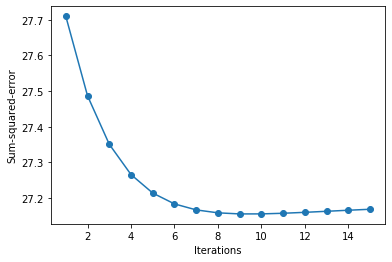

Wall time: 146 ms


In [314]:
%%time
sgd = StochasticGD(epochs=15, eta=0.001)

# shuffle data
np.random.seed(123)
idx = np.random.permutation(len(y))
X_shuffled, y_shuffled =  X[idx], y[idx]

# train and adaline and plot decision regions
sgd.train(X_shuffled, y_shuffled)
plt.plot(range(1, len(sgd.cost_)+1), sgd.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.show()

Weight Updates 1000


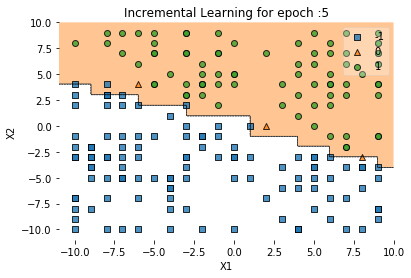

Weight Updates 2000


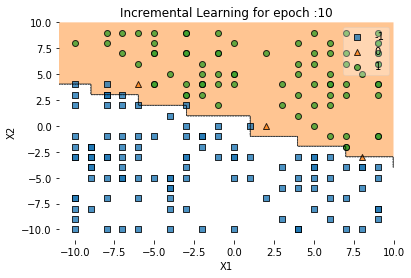

Weight Updates 10000


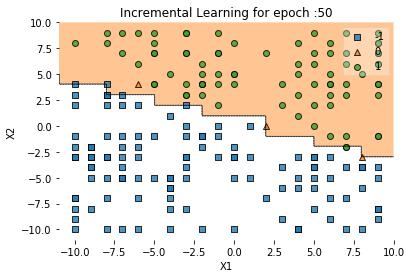

Weight Updates 20000


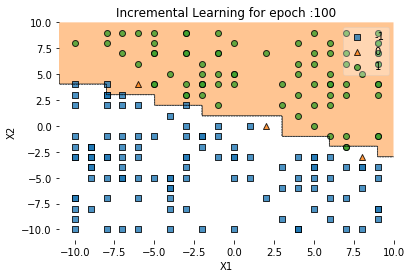

Wall time: 1.51 s


In [315]:
%%time
epoch_lst=[5,10,50,100]
for epoch in epoch_lst:
    sgd = StochasticGD(0.0001,epoch)
    sgd.train(X, y)
    plot_decision_regions(X, y, clf=sgd)
    plt.title('Incremental Learning for epoch :'+str(epoch))
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

Weight Updates for Batch learning is lower than Stochastic as the batch learning updates weights only once for the whole batch of training data for each epoch.
Whereas Stochastic/Incremental learning updates weights for every datapoint in the training data for each epoch.
And hence the wall time for Batch is a bit lower compared to Stochastic

In [316]:
class decayingEta(object):

    def __init__(self, eta, epochs):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        w_count=0
        n=1
        for i in range(self.epochs):
            output = self.net_input(X)
            #print(output.shape)
            errors = (y - output)
            #print(errors.shape)
            self.w_[1:] += self.eta * (n ** (i)) * X.T.dot(errors)
            self.w_[0] += self.eta * (n ** (i)) * errors.sum()
            n=0.8
            w_count+=1
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        print("Weight Updates "+str(w_count))
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

Weight Updates 20


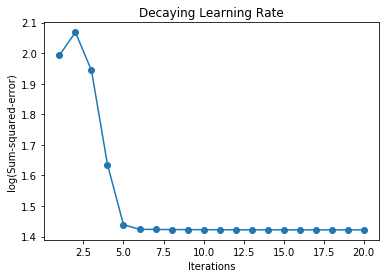

Wall time: 153 ms


In [317]:
%%time
ada = decayingEta(epochs=20, eta=0.0003).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), np.log10(ada.cost_), marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(Sum-squared-error)')
plt.title('Decaying Learning Rate')
plt.show()

In [319]:
class AdaptiveEta(object):

    def __init__(self, eta, epochs):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y,t,d,D):

        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        w_count=0
        error_old=np.zeros(X.shape[0])
        error=np.zeros(X.shape[0])
        for i in range(self.epochs):
            output = self.net_input(X)
            error=y-output
            self.w_[1:] += self.eta *  X.T.dot(error)
            self.w_[0] += self.eta * error.sum()
            for j in range(0,200):
                if error[j]-error_old[j]<t:
                    self.eta*=d
                    self.w_[1:] += self.eta *  X.T.dot(error)
                    self.w_[0] += self.eta * error.sum()
                elif (error[j]>error_old[j]):
                    self.eta*=D
                error_old[j]=error[j]
            cost = (error).sum()/2
            self.cost_.append(cost)
        print("Weight Updates "+str(w_count))
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

Weight Updates 0


C:\Users\bnama\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


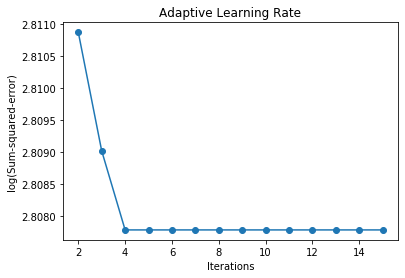

Wall time: 183 ms


In [320]:
%%time
ada = AdaptiveEta(epochs=15, eta=0.001).train(X, y,1.02,0.9,1.2)
plt.plot(range(1, len(ada.cost_)+1), np.log10(ada.cost_), marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(Sum-squared-error)')
plt.title('Adaptive Learning Rate')
plt.show()

Adapative learning rate is converging faster compared to decaying learning rate